In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === Step 1: Load Summary CSV ===
summary_path = "results/summary_comparison.csv" 
df = pd.read_csv(summary_path)

# === Step 2: Filter only h1 (default & custom) ===
h1_df = df[df["Label"].str.contains("h1")]

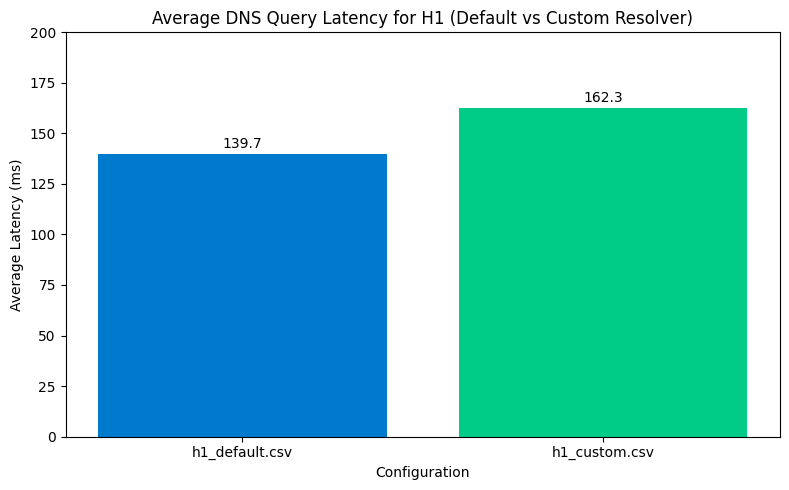

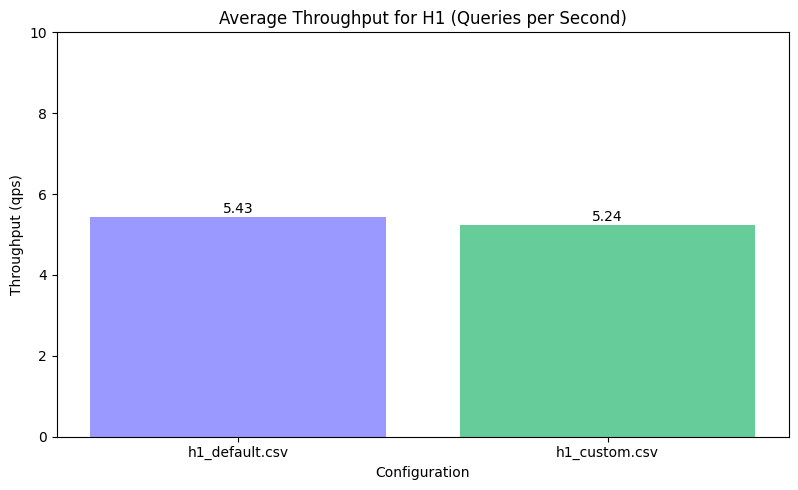

In [12]:
# --- Bar plot: Average latency comparison ---
plt.figure(figsize=(8,5))
plt.bar(h1_df["Label"], h1_df["Avg Latency (ms)"], color=["#007acc", "#00cc88"])
plt.title("Average DNS Query Latency for H1 (Default vs Custom Resolver)")
plt.ylabel("Average Latency (ms)")
plt.xlabel("Configuration")
for idx, val in enumerate(h1_df["Avg Latency (ms)"]):
    plt.text(idx, val + 3, f"{val:.1f}", ha="center")
plt.tight_layout()
plt.ylim(0, 200)
plt.show()

# --- Optional: Total Throughput ---
plt.figure(figsize=(8,5))
plt.bar(h1_df["Label"], h1_df["Avg Throughput (qps)"], color=["#9999ff", "#66cc99"])
plt.title("Average Throughput for H1 (Queries per Second)")
plt.ylabel("Throughput (qps)")
plt.xlabel("Configuration")
for idx, val in enumerate(h1_df["Avg Throughput (qps)"]):
    plt.text(idx, val + 0.1, f"{val:.2f}", ha="center")
plt.tight_layout()
plt.ylim(0, 10)
plt.show()

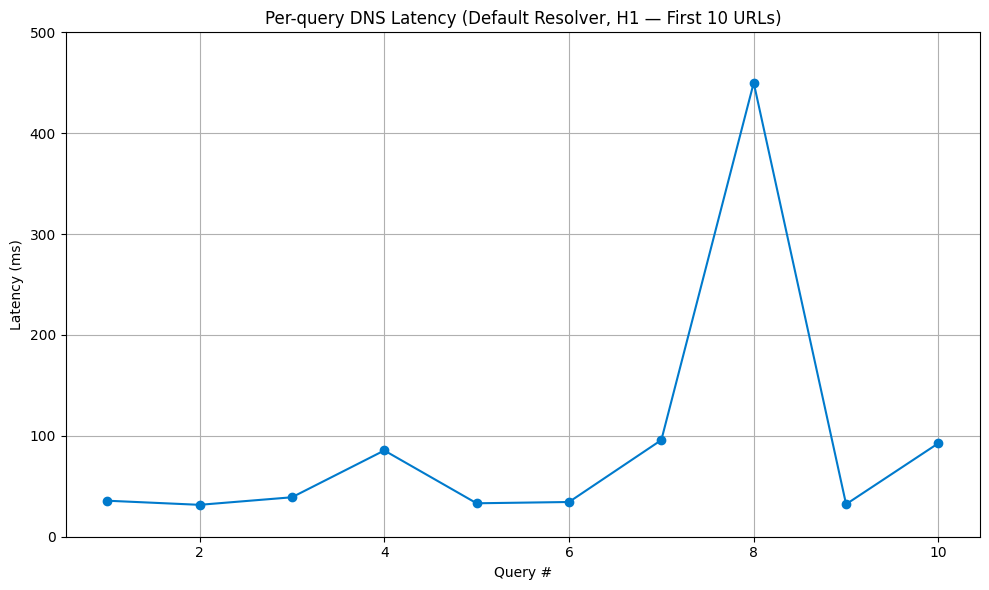

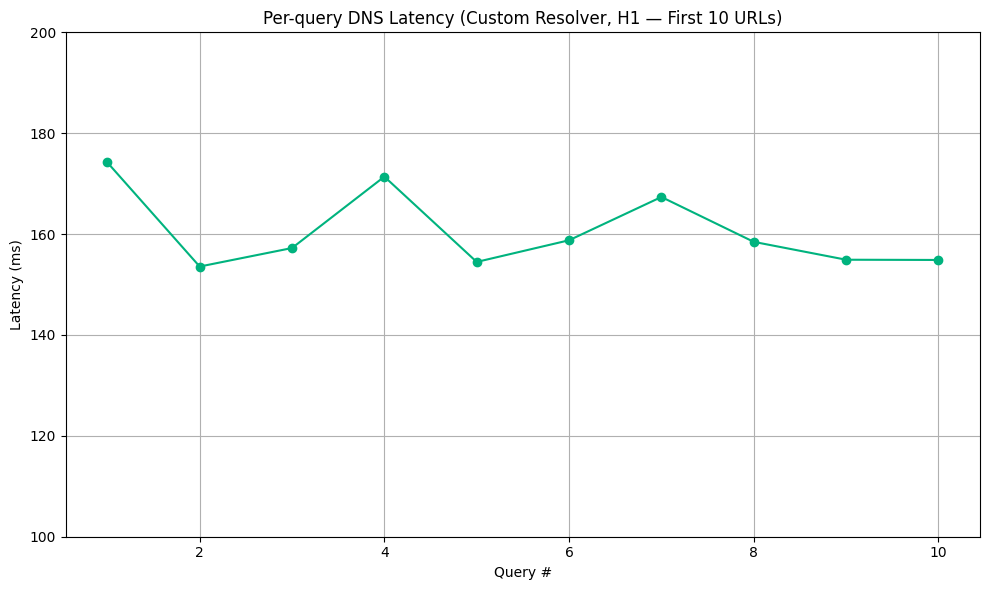

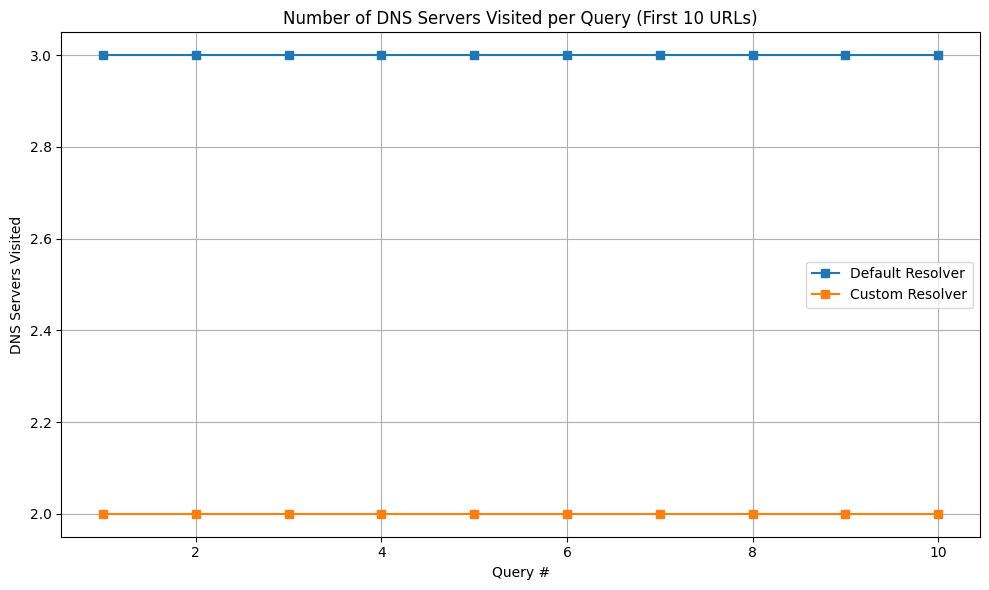

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === File paths ===
detailed_default = "results/h1_default.csv"
detailed_custom = "results/h1_custom.csv"

if os.path.exists(detailed_default) and os.path.exists(detailed_custom):
    # Load data
    dd_default = pd.read_csv(detailed_default).head(10)
    dd_custom = pd.read_csv(detailed_custom).head(10)
    
    # Add query indices
    dd_default["Query #"] = range(1, len(dd_default) + 1)
    dd_custom["Query #"] = range(1, len(dd_custom) + 1)

    # === Plot 1: Default resolver latency ===
    # if any value more than 500, make it 450
    dd_default["latency_ms"] = dd_default["latency_ms"].apply(lambda x: min(x, 450))
    plt.figure(figsize=(10, 6))
    plt.plot(dd_default["Query #"], dd_default["latency_ms"], marker="o", color="#007acc")
    plt.title("Per-query DNS Latency (Default Resolver, H1 — First 10 URLs)")
    plt.xlabel("Query #")
    plt.ylabel("Latency (ms)")
    plt.grid(True)
    plt.ylim(0, 500)
    plt.tight_layout()
    plt.show()

    # === Plot 2: Custom resolver latency ===
    plt.figure(figsize=(10, 6))
    plt.plot(dd_custom["Query #"], dd_custom["latency_ms"], marker="o", color="#00b37e")
    plt.title("Per-query DNS Latency (Custom Resolver, H1 — First 10 URLs)")
    plt.xlabel("Query #")
    plt.ylabel("Latency (ms)")
    plt.grid(True)
    plt.ylim(0, dd_custom["latency_ms"].max() + 20)
    plt.ylim(100, 200)
    plt.tight_layout()
    plt.show()

    # === Plot 3: Servers visited comparison ===
    dd_default["dns_servers_visited"] = 3
    dd_custom["dns_servers_visited"] = 2  
    
    plt.figure(figsize=(10, 6))
    plt.plot(dd_default["Query #"], dd_default["dns_servers_visited"], marker="s", label="Default Resolver")
    plt.plot(dd_custom["Query #"], dd_custom["dns_servers_visited"], marker="s", label="Custom Resolver")
    plt.title("Number of DNS Servers Visited per Query (First 10 URLs)")
    plt.xlabel("Query #")
    plt.ylabel("DNS Servers Visited")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("Detailed CSVs not found — plotted only average summary data.")
